In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('falcon9_data_class.csv')

In [3]:
df.head()

,FlightNumber,Date,RocketName,Longitude,Latitude,LaunchSite,PayloadMass,Orbit,Block,SerialNumber,ReusedCount,LandingOutcome,Flights,GridFins,Reused,Legs,LandingPad,Class
0,1,2010-06-04,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,7341.2,LEO,1.0,B0003,0,None None,1,False,False,False,NaN,0
1,2,2012-05-22,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,525.0,LEO,1.0,B0005,0,None None,1,False,False,False,NaN,0
2,3,2013-03-01,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,677.0,ISS,1.0,B0007,0,None None,1,False,False,False,NaN,0
3,4,2013-09-29,Falcon 9,-120.610829,34.632093,VAFB SLC 4E,500.0,PO,1.0,B1003,0,False Ocean,1,False,False,False,NaN,0
4,5,2013-12-03,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,3170.0,GTO,1.0,B1004,0,None None,1,False,False,False,NaN,0


In [4]:
df.isna().sum()

FlightNumber       0
Date               0
RocketName         0
Longitude          0
Latitude           0
LaunchSite         0
PayloadMass        0
Orbit              0
Block              0
SerialNumber       0
ReusedCount        0
LandingOutcome     0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Class              0
dtype: int64

In [5]:
df.groupby('LaunchSite')['Class'].mean()

LaunchSite
CCSFS SLC 40    0.680556
KSC LC 39A      0.848485
VAFB SLC 4E     0.812500
Name: Class, dtype: float64

## Exploratory Data Analysis

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

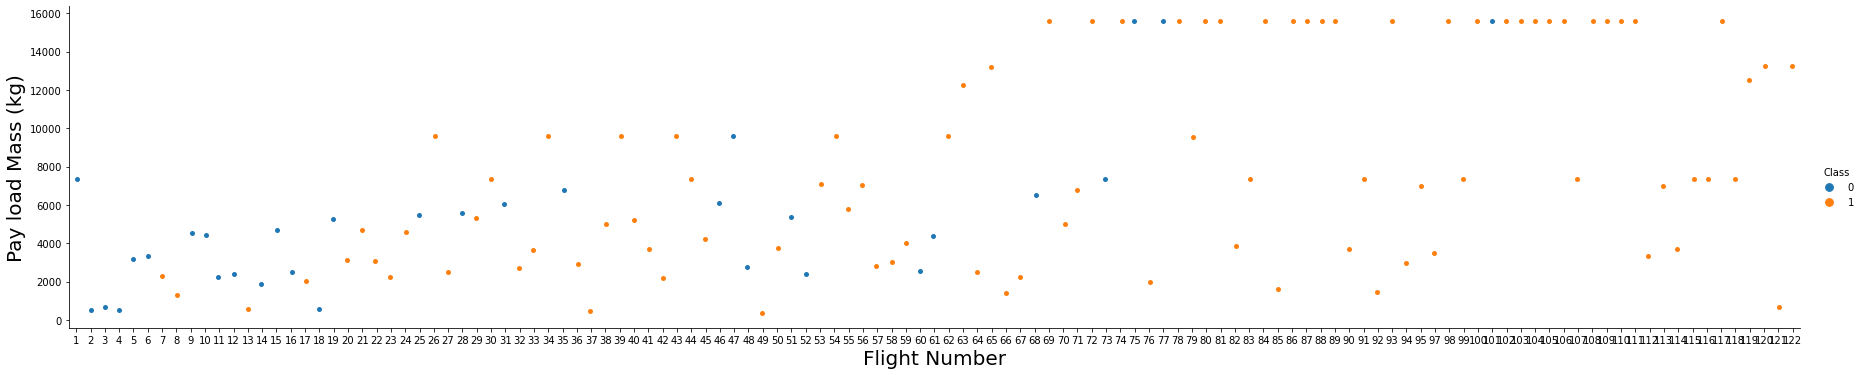

<Figure size 1080x720 with 0 Axes>

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.figure(figsize=(15,10))
plt.show()

Looking at the relationship between FlightNumber and LaunchSite and how the landing outcome was

<Figure size 1800x720 with 0 Axes>

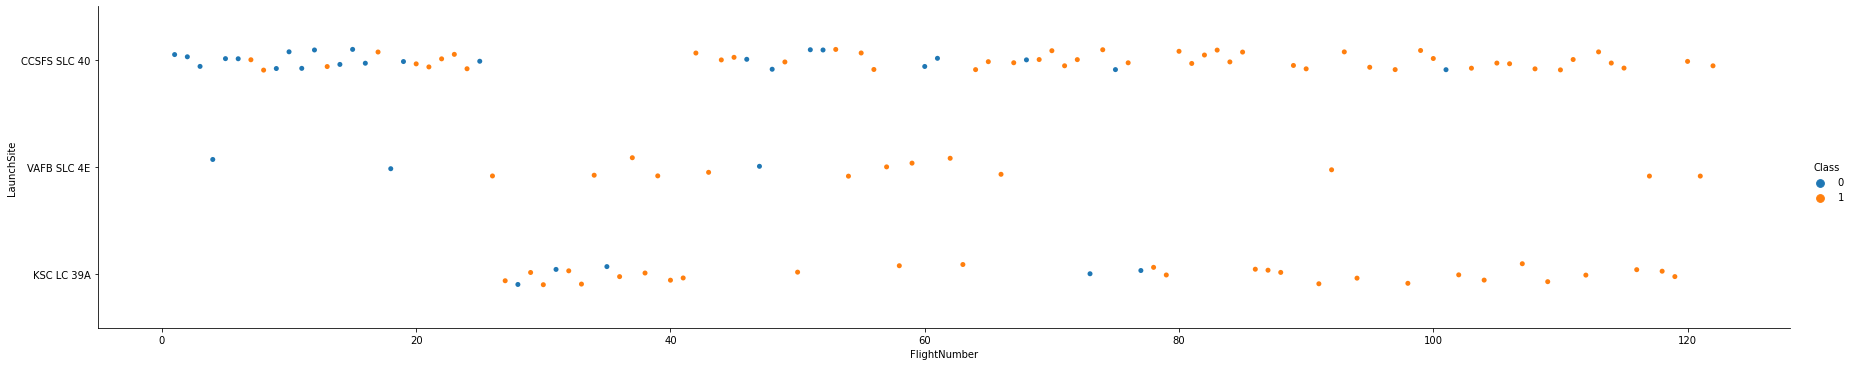

<Figure size 1800x720 with 0 Axes>

In [6]:
sns.catplot(x='FlightNumber', y='LaunchSite', data=df, aspect = 5, hue='Class')
plt.figure(figsize=(25,10))

Majority of the rockets' first stage landed successfully with PayloadMass under 8000 kg

<Figure size 1440x1080 with 0 Axes>

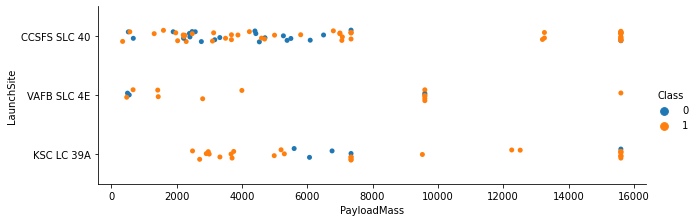

<Figure size 1440x1080 with 0 Axes>

In [10]:


sns.catplot(x='PayloadMass', y='LaunchSite', data=df, hue='Class', aspect = 3, height=3)
plt.figure(figsize=(20,15))

In [9]:
df.groupby('LaunchSite')['PayloadMass'].mean()

LaunchSite
CCSFS SLC 40    7116.993750
KSC LC 39A      8521.157576
VAFB SLC 4E     5916.437500
Name: PayloadMass, dtype: float64

Success rate of the first stage landing per orbit.

<AxesSubplot:xlabel='Orbit'>

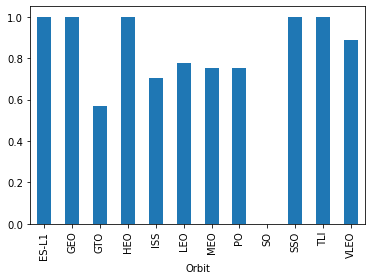

In [9]:
df.groupby('Orbit')['Class'].mean().plot(kind='bar')

Relationship of FlightNumber and Orbit

<AxesSubplot:xlabel='FlightNumber', ylabel='Orbit'>

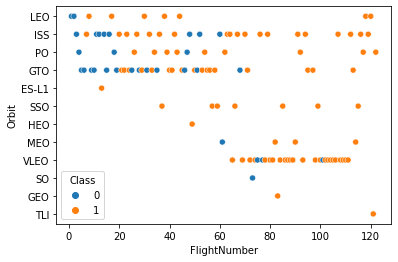

In [10]:
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class')

Relationship between Payload Mass and Orbit and how that affects the success of the first stage landing

<AxesSubplot:xlabel='PayloadMass', ylabel='Orbit'>

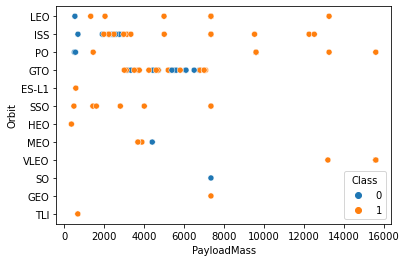

In [11]:
sns.scatterplot(x='PayloadMass', y='Orbit', data=df, hue='Class')

Convert date column to a datetime object

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

Extract the year from the Date column to use in visualizations

In [13]:
year=[]
def extractYear(data):
    for i in df['Date']:
        year.append(i.year)
    return year

In [14]:
df['Year'] = extractYear(df)

Text(0, 0.5, 'Success Rate')

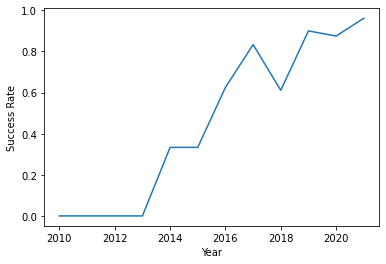

In [15]:
df.groupby('Year')['Class'].mean().plot(kind='line')
plt.ylabel('Success Rate')

In [16]:
df.corr()

,FlightNumber,Longitude,Latitude,PayloadMass,Block,ReusedCount,Flights,GridFins,Reused,Legs,Class,Year
FlightNumber,1.000000,0.071531,-0.070291,0.581178,0.863198,0.701505,0.688028,0.470174,0.683773,0.422480,0.470138,0.951862
Longitude,0.071531,1.000000,-0.999960,0.106180,0.002235,0.060080,0.106038,-0.108111,0.029080,-0.034420,-0.061573,0.061399
Latitude,-0.070291,-0.999960,1.000000,-0.105143,-0.000580,-0.059660,-0.105870,0.109007,-0.028709,0.035046,0.063049,-0.059735
PayloadMass,0.581178,0.106180,-0.105143,1.000000,0.524360,0.687427,0.683032,0.286231,0.533877,0.234365,0.237929,0.586093
Block,0.863198,0.002235,-0.000580,0.524360,1.000000,0.678774,0.488566,0.494136,0.606705,0.431334,0.479460,0.905175
ReusedCount,0.701505,0.060080,-0.059660,0.687427,0.678774,1.000000,0.724717,0.406620,0.594392,0.385585,0.481191,0.706071
Flights,0.688028,0.106038,-0.105870,0.683032,0.488566,0.724717,1.000000,0.253777,0.665494,0.233284,0.254167,0.623244
GridFins,0.470174,-0.108111,0.109007,0.286231,0.494136,0.406620,0.253777,1.000000,0.300929,0.908735,0.656281,0.562602
Reused,0.683773,0.029080,-0.028709,0.533877,0.606705,0.594392,0.665494,0.300929,1.000000,0.237199,0.290575,0.674336
Legs,0.422480,-0.034420,0.035046,0.234365,0.431334,0.385585,0.233284,0.908735,0.237199,1.000000,0.683353,0.506194


In [41]:
df.head()

,FlightNumber,Date,RocketName,Longitude,Latitude,LaunchSite,PayloadMass,Orbit,Block,SerialNumber,ReusedCount,LandingOutcome,Flights,GridFins,Reused,Legs,LandingPad,Class,Year
0,1,2010-06-04,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,7341.2,LEO,1.0,B0003,0,None None,1,False,False,False,NaN,0,2010
1,2,2012-05-22,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,525.0,LEO,1.0,B0005,0,None None,1,False,False,False,NaN,0,2012
2,3,2013-03-01,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,677.0,ISS,1.0,B0007,0,None None,1,False,False,False,NaN,0,2013
3,4,2013-09-29,Falcon 9,-120.610829,34.632093,VAFB SLC 4E,500.0,PO,1.0,B1003,0,False Ocean,1,False,False,False,NaN,0,2013
4,5,2013-12-03,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,3170.0,GTO,1.0,B1004,0,None None,1,False,False,False,NaN,0,2013


### Feature Engineering

Selecting all the important features towards determining success of landing

In [78]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'SerialNumber']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,SerialNumber
0,1,7341.2,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Turning the columns with boolean values to binary

In [79]:
features[['GridFins', 'Reused', 'Legs']]= features[['GridFins', 'Reused', 'Legs']].astype(int)

C:\Users\shami\.conda\envs\JunoDataAnalytics\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [80]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,SerialNumber
0,1,7341.2,LEO,CCSFS SLC 40,1,0,0,0,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,0,0,0,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,0,0,0,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,0,0,0,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,0,0,0,NaN,1.0,0,B1004


One hot encode the important categorical features

In [81]:
one_hot_features = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'SerialNumber']])

In [82]:
engineered_features = pd.concat([features, one_hot_features], axis = 1)

In [83]:
engineered_features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,SerialNumber_B1051,SerialNumber_B1054,SerialNumber_B1056,SerialNumber_B1058,SerialNumber_B1059,SerialNumber_B1060,SerialNumber_B1061,SerialNumber_B1062,SerialNumber_B1063,SerialNumber_B1067
0,1,7341.2,LEO,CCSFS SLC 40,1,0,0,0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.0,LEO,CCSFS SLC 40,1,0,0,0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.0,ISS,CCSFS SLC 40,1,0,0,0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.0,PO,VAFB SLC 4E,1,0,0,0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.0,GTO,CCSFS SLC 40,1,0,0,0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
engineered_features.drop(columns=['Orbit', 'LaunchSite', 'LandingPad', 'SerialNumber'], inplace=True)

In [86]:
engineered_features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,SerialNumber_B1051,SerialNumber_B1054,SerialNumber_B1056,SerialNumber_B1058,SerialNumber_B1059,SerialNumber_B1060,SerialNumber_B1061,SerialNumber_B1062,SerialNumber_B1063,SerialNumber_B1067
0,1,7341.2,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
engineered_features.to_csv('engineered_features.csv', index=False)